In [17]:
### Import libraries

import os
import PIL
import requests
import math

import numpy as np
import matplotlib.pyplot as plt

[[ 57  59  58  67  82]
 [ 63  66  75 100 124]
 [ 61  69  89 121 150]
 [ 71  96 126 145 157]]


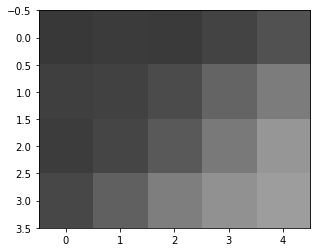

In [18]:
img = np.array([[57,59,58,67,82],[63,66,75,100,124],[61,69,89,121,150],[71,96,126,145,157]])
#img = np.array([[61,75],[74,120]])
print(img)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

In [19]:
### Max pooling function

def maxpooling(img, pool_height, pool_width,stride):


  # Compute dimensions of output image
  out_height = math.floor((img.shape[0] - pool_height) / stride) + 1
  out_width = math.floor((img.shape[1] - pool_width) / stride) + 1
  print("out_height=",out_height)
  print("out_width=",out_width)
  
  # Create blank output image
  pooled_img = np.zeros((out_height, out_width))

    
  for i in np.arange(0, out_height):
      for j in np.arange(0, out_width):
            
            #set initial max value
            maxval=img[(stride * i), (stride * j)]
            
            for m in np.arange(0,out_height,stride): #remove stride parameter from here in github code
                for n in np.arange(0,out_width,stride):
                    if(img[(stride * i), (stride * j)] > maxval):
                        maxval = img[(stride * i) + m, (stride * j) + n] #update max value
                    
                pooled_img[i,j] = maxval

            
                    
  # Round all elements, convert to integers, and clamp to values between 0 and 255
  pooled_img = np.rint(pooled_img).astype(int)
  pooled_img = np.clip(pooled_img, 0, 255)

  return pooled_img

out_height= 2
out_width= 2
[[57 58]
 [61 89]]


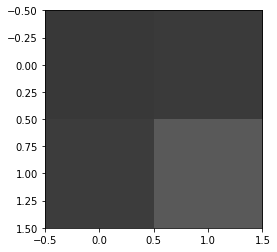

In [20]:
### Test image with pool size of (2, 2)

# Call your pooling function (with pool_size=(2, 2))
out_img = maxpooling(img, 2, 2, 2)
print(out_img)
#view array as image
plt.imshow(out_img, cmap='gray', vmin=0, vmax=255)